<a href="https://colab.research.google.com/github/felipeaninir/sales-predictions/blob/main/data_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/MyDrive/PTDataScience/PandasParaManipulaciónDeDatos/sales_predictions.csv')
print(df.shape)
df.head()

(8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<BarContainer object of 10 artists>

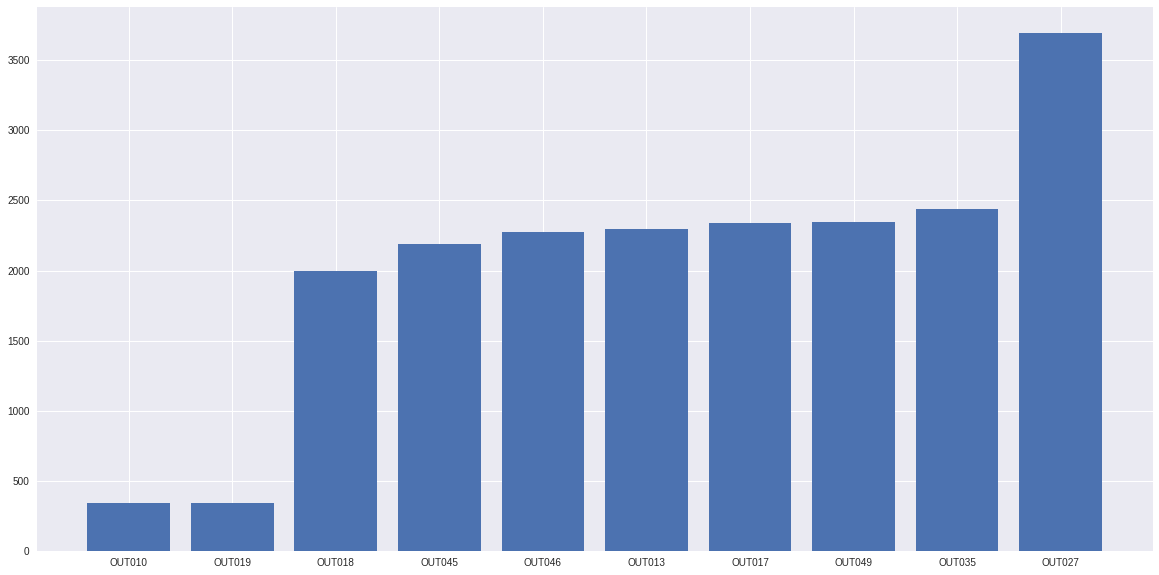

In [25]:
mean_sales = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().sort_values(ascending = True)
plt.figure(figsize=(20, 10))
plt.style.use('seaborn')
plt.bar(mean_sales.index, mean_sales.values)

Text(0, 0.5, 'Frequency')

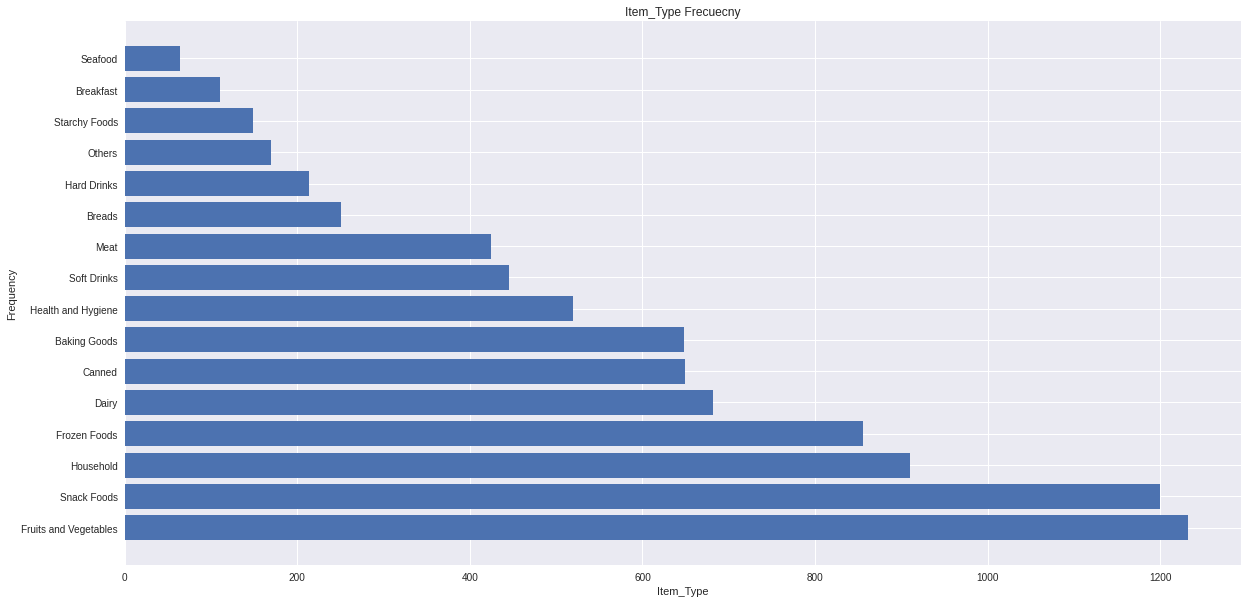

In [5]:
plt.figure(figsize=(20, 10))
plt.barh(df['Item_Type'].value_counts().index, df['Item_Type'].value_counts(), align='center', data=df)
plt.title('Item_Type Frecuecny')
plt.xlabel('Item_Type')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

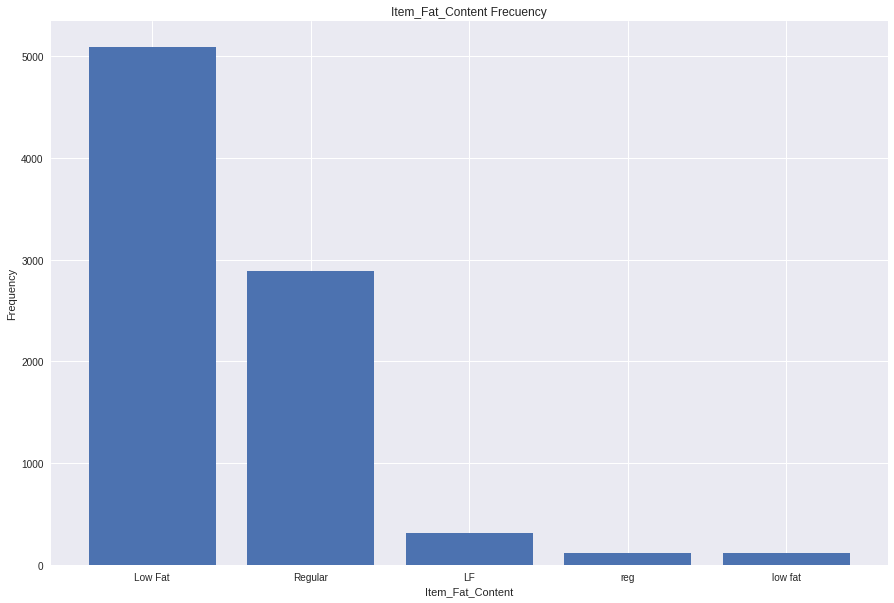

In [12]:
plt.figure(figsize=(15, 10))
plt.bar(df['Item_Fat_Content'].value_counts().index, df['Item_Fat_Content'].value_counts(), data=df)
plt.title('Item_Fat_Content Frecuency')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Frequency')

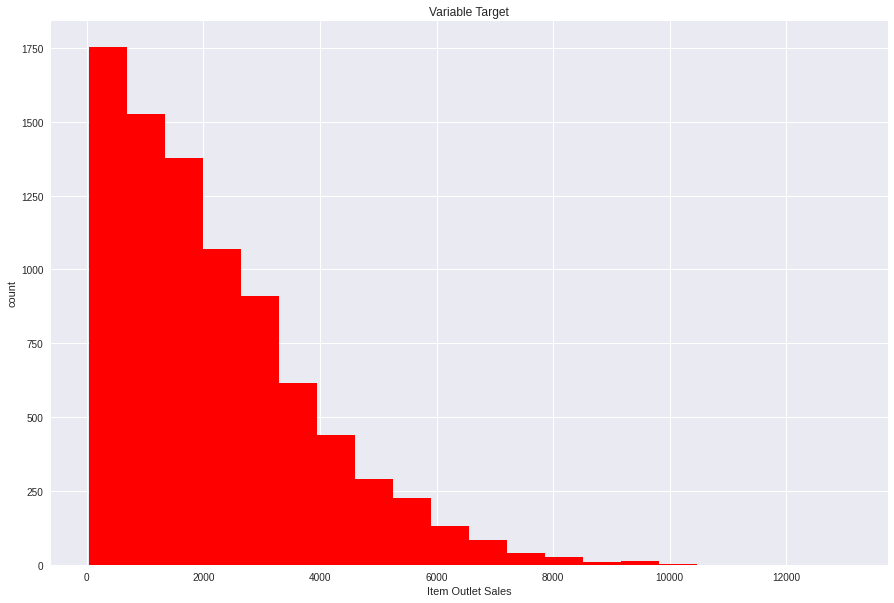

In [15]:
plt.figure(figsize=(15, 10))
plt.hist(df['Item_Outlet_Sales'], bins = 20, color = 'red')
plt.title('Variable Target')
plt.xlabel('Item Outlet Sales')
plt.ylabel('count')
plt.show()

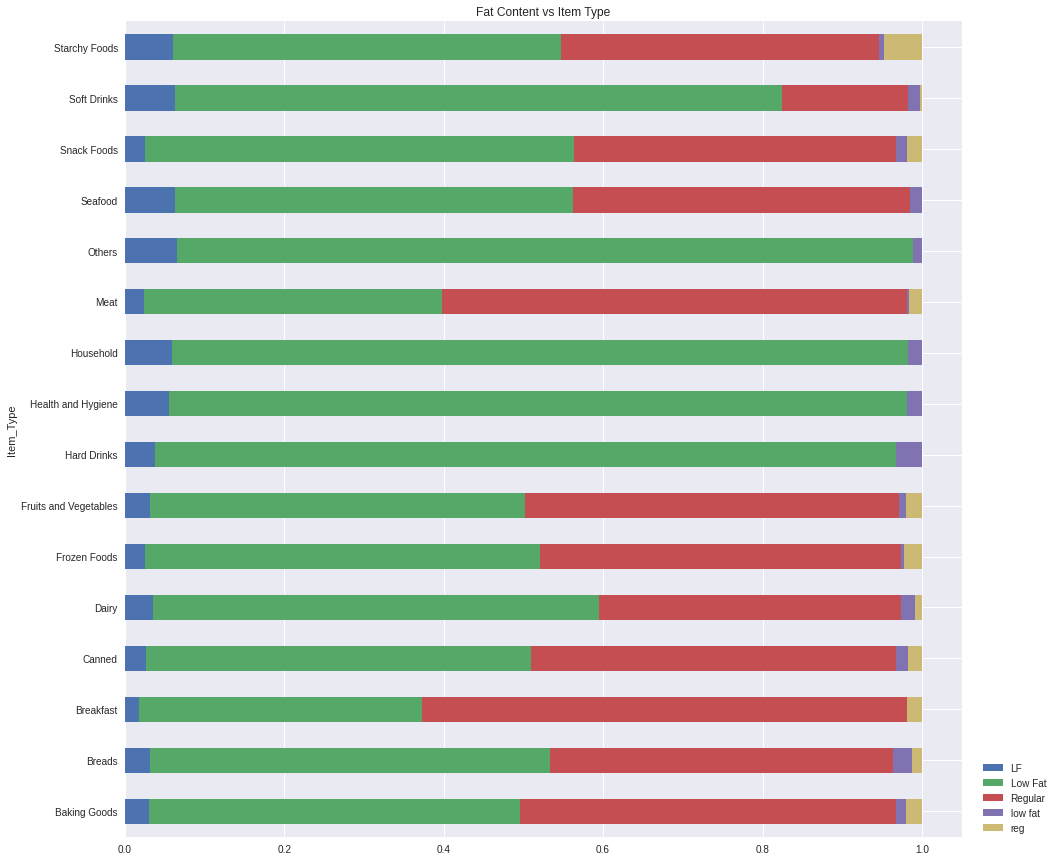

In [22]:
Item_Type = pd.crosstab(df['Item_Type'], df['Item_Fat_Content'])
Item_Type.div(Item_Type.sum(1).astype(float), axis=0).plot(kind="barh", stacked=True, figsize=(15, 15))
plt.title('Fat Content vs Item Type')
plt.legend(loc=(1.02,0))